<a href="https://colab.research.google.com/github/junhansong/deeplearning/blob/master/deeplearning/run_project/18_RNN1_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 호출


In [0]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt



### 로이터 뉴스 데이터셋 불러오기


In [2]:
from keras.datasets import reuters
from keras.models import Sequential

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding

from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils





Using TensorFlow backend.


### seed 값 설정


In [0]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)



### 불러온 데이터를 학습셋, 테스트셋으로 나누기


In [4]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)



2113536/2110848 [==============================] - 1s 1us/step


### 데이터 확인하기


In [5]:
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])



46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


### 데이터 전처리


In [0]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)



### 모델의 설정


In [0]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))



### 모델의 컴파일


In [0]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])



### 모델의 실행


In [9]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 26s 3ms/step - loss: 2.5576 - accuracy: 0.3717 - val_loss: 2.0103 - val_accuracy: 0.4920
Epoch 2/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.9003 - accuracy: 0.4945 - val_loss: 1.8576 - val_accuracy: 0.4862
Epoch 3/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.8073 - accuracy: 0.5253 - val_loss: 1.7992 - val_accuracy: 0.5227
Epoch 4/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.7909 - accuracy: 0.5181 - val_loss: 1.7559 - val_accuracy: 0.5512
Epoch 5/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.6729 - accuracy: 0.5679 - val_loss: 1.6581 - val_accuracy: 0.5926
Epoch 6/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.5712 - accuracy: 0.5978 - val_loss: 1.5899 - val_accuracy: 0.6060
Epoch 7/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.456

### 테스트 정확도 출력


In [10]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))




2246/2246 [==============================] - 2s 871us/step

 Test Accuracy: 0.7044


### 테스트 셋의 오차


In [0]:
y_vloss = history.history['val_loss']



### 학습셋의 오차


In [0]:
y_loss = history.history['loss']



### 그래프로 표현


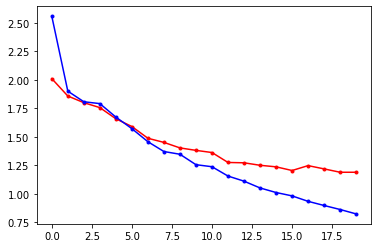

In [13]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')



### 그래프에 그리드를 주고 레이블을 표시


No handles with labels found to put in legend.


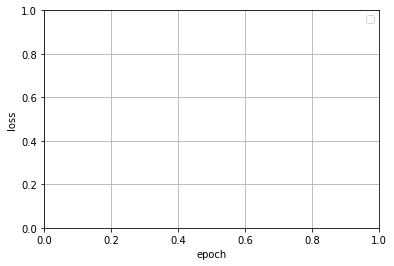

In [14]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
